Notebook based on https://keras.io/examples/vision/mnist_convnet/

# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 4ms/step - loss: 0.7591 - accuracy: 0.7657 - val_loss: 0.0797 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9635 - val_loss: 0.0570 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9731 - val_loss: 0.0449 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0357 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0354 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 

# Evaluate the trained model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02391480840742588
Test accuracy: 0.9912999868392944


# See bad predictions

In [49]:
preds = model.predict(x_test)

preds_labels  = np.argmax(preds, axis=1) # Class probs to label
y_test_labels = np.argmax(y_test, axis=1) # Onehot to label

wrong_x = x_test[preds_labels != y_test_labels]
wrong_y = y_test_labels[preds_labels != y_test_labels]
wrong_p = preds_labels[preds_labels != y_test_labels]

print("There are", wrong_p.shape[0], "errors of", x_test.shape[0], "images")

There are 87 errors of 10000 images


In [50]:
def see_bad_sample(i):
    plt.imshow(wrong_x[i])
    plt.title("Predicted: " + str(wrong_p[i]) + ", Real: " + str(wrong_y[i]) )
    plt.show()

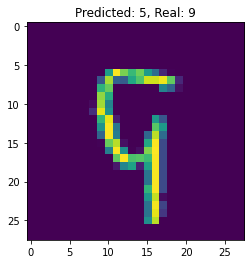

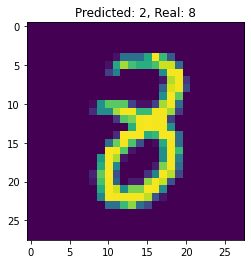

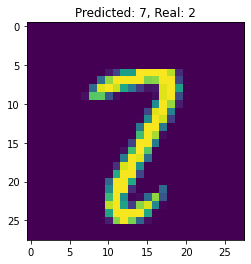

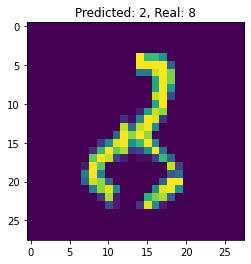

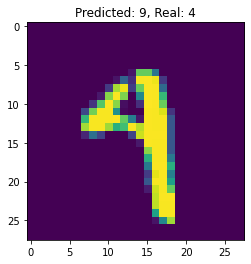

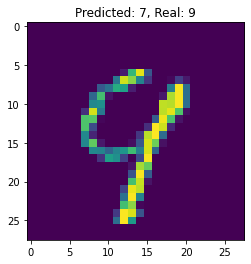

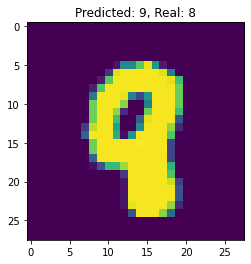

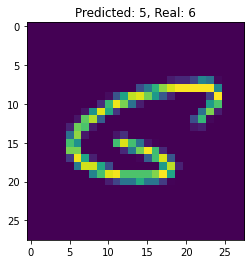

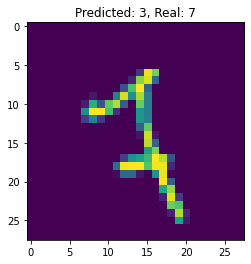

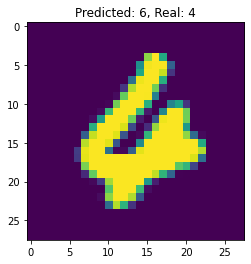

In [51]:
for i in range(10):
    see_bad_sample(i)